In [2]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :diff-boundary-corrfn)
(asdf:load-system :numpy-file-format)

T

T

T

In [15]:
;; Create a function which sums values of 4 random bell-shaped curves
(defparameter *field*
  (diff-boundary-corrfn/math:gaussian-field
    (diff-boundary-corrfn/math:random-gaussians 4)))

*FIELD*

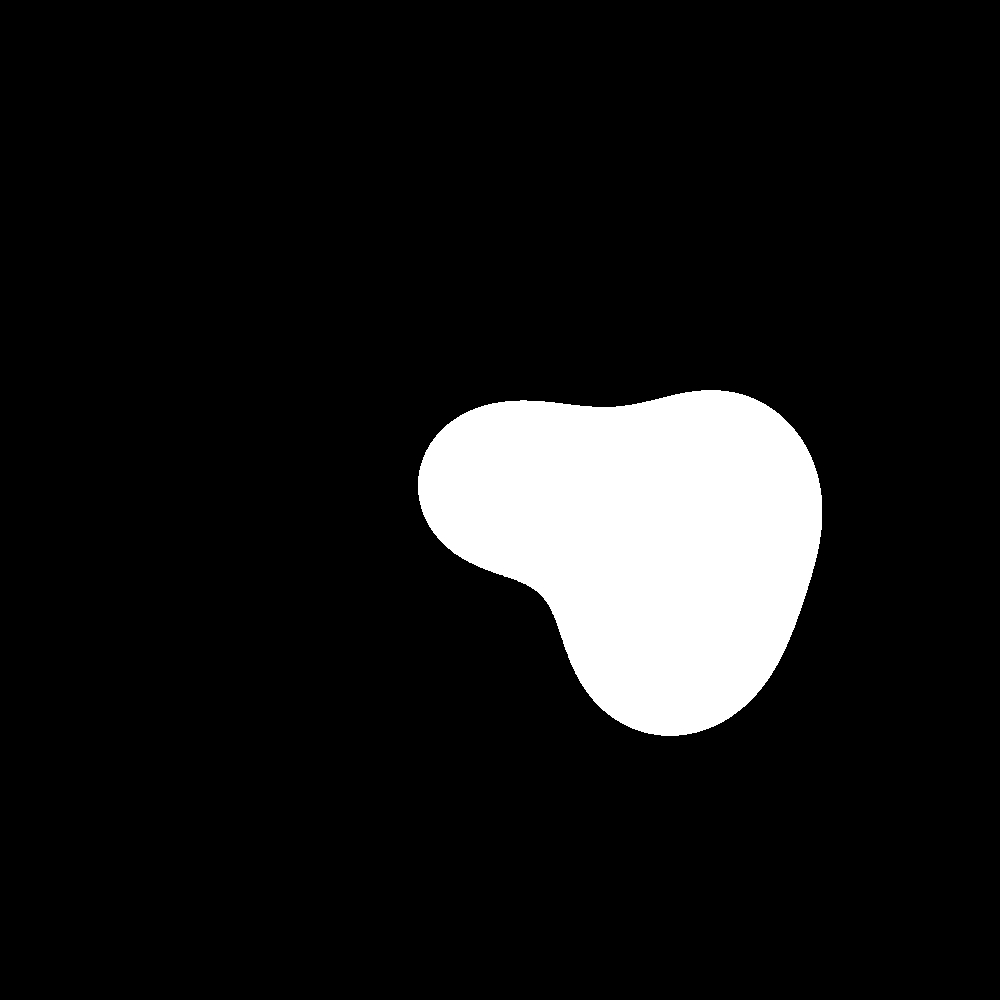

In [16]:
;; Evaluate it at points in uniform 3000x3000 grid and save an image
(let ((image (imago:make-binary-image-from-pixels
               (let ((descr (diff-boundary-corrfn:discretize-field 3000 *field*)))
                 (aops:vectorize* 'bit (descr) (if (> descr 5.0) 1 0))))))
  (imago:write-image image "/jails/julia/home/vasily/field.pbm")
  (imago-jupyter:show-image
    (imago:resize image 1000 1000)))

In [17]:
;; Calculate surface surface function along the line X = 0.1
(defparameter *ss*
  (sb-int:with-float-traps-masked
    (:divide-by-zero)
    (loop with x = 0.1
          for y from -0.5 to 0.5 by 0.1 collect
          (list x y
                (diff-boundary-corrfn:surface-surface
                  *field* 5.0
                  (list x y))))))

*SS*

In [18]:
;; Save it as a numpy array
(numpy-file-format:store-array
 (make-array (list (length *ss*) 3) :element-type 'single-float :initial-contents *ss*)
 "/jails/julia/home/vasily/ss-precise.npy")

NIL

In [19]:
*ss*

((0.1 -0.5 3.1196668) (0.1 -0.4 2.3051527) (0.1 -0.3 2.0476816)
 (0.1 -0.20000002 2.316381) (0.1 -0.10000002 3.4151125)
 (0.1 -1.4901161e-8 4.845069) (0.1 0.09999999 6.076795)
 (0.1 0.19999999 2.249085) (0.1 0.29999998 2.0324867)
 (0.1 0.39999998 2.2664275) (0.1 0.49999997 2.2366393))